In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%ls
%cd CNNtention/

CNNtention/  assignment4/  examples/  getting_started.ipynb*
/teamspace/studios/this_studio/CNNtention


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import pipeline_template, mlflow, torch, torchvision
from experiment_configs import configs, ExperimentConfig, ModelConfig, DataConfig
from models.resnet_cbam import ResnetCBAM
from models.original_basic_block import OriginalBasicBlock
from skorch.callbacks import LRScheduler
from skorch.dataset import ValidSplit
from torch.optim.lr_scheduler import MultiStepLR
from torchvision.transforms import transforms
mlflow.set_tracking_uri('file:./mlruns')

In [13]:
config={"cbam_resnet20_tuning_reduction_32": lambda: ExperimentConfig(
        "CBAM Attention ResNet20 Tuning w/ reduction 32",
        DataConfig(name='CIFAR-10',
                   test_size=10000,
                   train_transform=transforms.Compose([
                transforms.RandomHorizontalFlip(0.5),
                transforms.RandomCrop(32, padding=4),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.4918687901200927, 0.49185976472299225, 0.4918583862227116], std=[0.24697121702736, 0.24696766978537033, 0.2469719877121087])
            ]),
            test_transform=transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.4918687901200927, 0.49185976472299225, 0.4918583862227116], std=[0.24697121702736, 0.24696766978537033, 0.2469719877121087])
            ])),
        ModelConfig(model=ResnetCBAM(OriginalBasicBlock, [3,3,3], 10, 32),
                    lr=0.005,
                    optimizer=torch.optim.Adam,
                    weight_decay=0.0001,
                    use_reg=True,
                    batch_size=128,
                    max_epochs=64000//(45000 // 128),
                    momentum=0.9,
                    train_split=ValidSplit(cv=0.1),
                    scheduler=LRScheduler(
                        policy=MultiStepLR,
                        milestones=[
                            16000 // (45000 // 128), # == 45
                            32000 // (45000 // 128), # == 91
                            48000 // (45000 // 128) # == 136
                        ],
                        gamma=0.1 # this is the multiplication factor ("divide it by 10")
                    ),
                    log_model=True,
                    use_early_stopping=False,
                    add_test_set_eval=False,
                    )
    )}

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/nn/init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/nn/init.py:498: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


=== Model Details ===
ResnetCBAM(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (layer1): Sequential(
    (0): OriginalBasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU()
    )
    (1): OriginalBasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1


Experiment ID: 406784709186655786

Run ID: 5dae6de45fac4f40988fbee5ccb21e28
Model is saved at: ('/teamspace/studios/this_studio/CNNtention', '406784709186655786/5dae6de45fac4f40988fbee5ccb21e28')
MLflow Tracking URI: file:./mlruns
Using device: CUDA
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/392 [00:00<?, ?it/s]

  epoch    train_err    train_loss    valid_acc    valid_err    valid_loss      lr      dur
-------  -----------  ------------  -----------  -----------  ------------  ------  -------
      1      55.1489        1.8294       0.4542       0.5458        1.5168  0.0050  33.7029


  0%|          | 0/392 [00:00<?, ?it/s]

      2      48.1000        1.2556       0.5258       0.4742        1.4224  0.0050  35.8067


  0%|          | 0/392 [00:00<?, ?it/s]

      3      44.4733        1.0095       0.5534       0.4466        1.3586  0.0050  37.8441


  0%|          | 0/392 [00:00<?, ?it/s]

      4      33.0178        0.8642       0.6586       0.3414        0.9721  0.0050  36.5438


  0%|          | 0/392 [00:00<?, ?it/s]

      5      27.7067        0.7620       0.7204       0.2796        0.8304  0.0050  36.5739


  0%|          | 0/392 [00:00<?, ?it/s]

      6      27.0067        0.6938       0.7208       0.2792        0.7986  0.0050  37.5723


  0%|          | 0/392 [00:00<?, ?it/s]

      7      29.2267        0.6479       0.6918       0.3082        0.9603  0.0050  38.5719


  0%|          | 0/392 [00:00<?, ?it/s]

      8      22.0667        0.6144       0.7650       0.2350        0.6853  0.0050  37.1332


  0%|          | 0/392 [00:00<?, ?it/s]

      9      20.5889        0.5857       0.7756       0.2244        0.6658  0.0050  37.5539


  0%|          | 0/392 [00:00<?, ?it/s]

     10      20.2400        0.5614       0.7798       0.2202        0.6407  0.0050  36.6999


  0%|          | 0/392 [00:00<?, ?it/s]

     11      20.2267        0.5409       0.7796       0.2204        0.6375  0.0050  36.1391


  0%|          | 0/392 [00:00<?, ?it/s]

     12      20.4667        0.5297       0.7876       0.2124        0.6392  0.0050  36.5944


  0%|          | 0/392 [00:00<?, ?it/s]

     13      21.8400        0.5120       0.7616       0.2384        0.6844  0.0050  36.8909


  0%|          | 0/392 [00:00<?, ?it/s]

     14      17.4911        0.5057       0.8026       0.1974        0.5754  0.0050  37.3016


  0%|          | 0/392 [00:00<?, ?it/s]

     15      19.6444        0.4911       0.7774       0.2226        0.6357  0.0050  37.3054


  0%|          | 0/392 [00:00<?, ?it/s]

     16      18.1444        0.4814       0.7976       0.2024        0.5997  0.0050  37.5925


  0%|          | 0/392 [00:00<?, ?it/s]

     17      19.5711        0.4749       0.7812       0.2188        0.6679  0.0050  36.8055


  0%|          | 0/392 [00:00<?, ?it/s]

     18      16.0778        0.4685       0.8172       0.1828        0.5653  0.0050  36.3018


  0%|          | 0/392 [00:00<?, ?it/s]

     19      20.2733        0.4608       0.7694       0.2306        0.7096  0.0050  36.4196


  0%|          | 0/392 [00:00<?, ?it/s]

     20      21.1622        0.4567       0.7638       0.2362        0.7027  0.0050  35.9582


  0%|          | 0/392 [00:00<?, ?it/s]

     21      16.5933        0.4502       0.8060       0.1940        0.5694  0.0050  35.6348


  0%|          | 0/392 [00:00<?, ?it/s]

     22      16.1467        0.4460       0.8118       0.1882        0.5518  0.0050  37.5450


  0%|          | 0/392 [00:00<?, ?it/s]

     23      17.4867        0.4400       0.8012       0.1988        0.5972  0.0050  36.3088


  0%|          | 0/392 [00:00<?, ?it/s]

     24      15.9622        0.4319       0.8156       0.1844        0.5248  0.0050  36.9138


  0%|          | 0/392 [00:00<?, ?it/s]

     25      16.2289        0.4299       0.8140       0.1860        0.5465  0.0050  36.8783


  0%|          | 0/392 [00:00<?, ?it/s]

     26      16.7911        0.4288       0.8082       0.1918        0.5616  0.0050  37.4397


  0%|          | 0/392 [00:00<?, ?it/s]

     27      15.7867        0.4219       0.8218       0.1782        0.5418  0.0050  37.3295


  0%|          | 0/392 [00:00<?, ?it/s]

     28      17.1044        0.4191       0.8090       0.1910        0.5667  0.0050  36.9727


  0%|          | 0/392 [00:00<?, ?it/s]

     29      15.3889        0.4209       0.8248       0.1752        0.5258  0.0050  36.8346


  0%|          | 0/392 [00:00<?, ?it/s]

     30      14.5489        0.4147       0.8288       0.1712        0.4996  0.0050  35.5826


  0%|          | 0/392 [00:00<?, ?it/s]

     31      15.3400        0.4121       0.8254       0.1746        0.5197  0.0050  37.6948


  0%|          | 0/392 [00:00<?, ?it/s]

     32      17.5178        0.4126       0.8060       0.1940        0.5879  0.0050  36.2899


  0%|          | 0/392 [00:00<?, ?it/s]

     33      15.1867        0.4035       0.8190       0.1810        0.5454  0.0050  36.6751


  0%|          | 0/392 [00:00<?, ?it/s]

     34      13.9822        0.4067       0.8326       0.1674        0.4983  0.0050  35.7437


  0%|          | 0/392 [00:00<?, ?it/s]

     35      19.2111        0.3986       0.7736       0.2264        0.6977  0.0050  38.2565


  0%|          | 0/392 [00:00<?, ?it/s]

     36      14.3533        0.3976       0.8310       0.1690        0.4871  0.0050  37.2406


  0%|          | 0/392 [00:00<?, ?it/s]

     37      15.7867        0.3944       0.8154       0.1846        0.5706  0.0050  38.0607


  0%|          | 0/392 [00:00<?, ?it/s]

     38      14.4733        0.3962       0.8226       0.1774        0.5149  0.0050  35.8759


  0%|          | 0/392 [00:00<?, ?it/s]

     39      15.2822        0.3916       0.8184       0.1816        0.5427  0.0050  37.4371


  0%|          | 0/392 [00:00<?, ?it/s]

     40      15.3089        0.3860       0.8222       0.1778        0.5401  0.0050  37.4611


  0%|          | 0/392 [00:00<?, ?it/s]

     41      15.7000        0.3919       0.8104       0.1896        0.5289  0.0050  36.7257


  0%|          | 0/392 [00:00<?, ?it/s]

     42      13.5200        0.3894       0.8370       0.1630        0.4811  0.0050  35.3992


  0%|          | 0/392 [00:00<?, ?it/s]

     43      13.7756        0.3929       0.8352       0.1648        0.4842  0.0050  36.1489


  0%|          | 0/392 [00:00<?, ?it/s]

     44      15.6556        0.3855       0.8132       0.1868        0.5655  0.0050  36.1317


  0%|          | 0/392 [00:00<?, ?it/s]

     45      13.5711        0.3795       0.8336       0.1664        0.4891  0.0050  36.6562


  0%|          | 0/392 [00:00<?, ?it/s]

     46       7.9267        0.2789       0.8876       0.1124        0.3309  0.0005  36.4850


  0%|          | 0/392 [00:00<?, ?it/s]

     47       7.2711        0.2404       0.8870       0.1130        0.3342  0.0005  37.5875


  0%|          | 0/392 [00:00<?, ?it/s]

     48       6.9956        0.2272       0.8976       0.1024        0.3120  0.0005  38.2166


  0%|          | 0/392 [00:00<?, ?it/s]

     49       6.5600        0.2201       0.8962       0.1038        0.3177  0.0005  37.0906


  0%|          | 0/392 [00:00<?, ?it/s]

     50       6.6289        0.2108       0.8930       0.1070        0.3311  0.0005  37.8748


  0%|          | 0/392 [00:00<?, ?it/s]

     51       6.3600        0.2030       0.8982       0.1018        0.3209  0.0005  37.6013


  0%|          | 0/392 [00:00<?, ?it/s]

     52       5.9889        0.1964       0.8938       0.1062        0.3317  0.0005  36.1572


  0%|          | 0/392 [00:00<?, ?it/s]

     53       5.8978        0.1861       0.8916       0.1084        0.3496  0.0005  38.3243


  0%|          | 0/392 [00:00<?, ?it/s]

     54       5.6489        0.1857       0.8956       0.1044        0.3321  0.0005  36.9644


  0%|          | 0/392 [00:00<?, ?it/s]

     55       5.5600        0.1782       0.8928       0.1072        0.3484  0.0005  38.0101


  0%|          | 0/392 [00:00<?, ?it/s]

     56       5.3844        0.1726       0.8948       0.1052        0.3407  0.0005  37.5687


  0%|          | 0/392 [00:00<?, ?it/s]

     57       5.1200        0.1708       0.8968       0.1032        0.3269  0.0005  37.7538


  0%|          | 0/392 [00:00<?, ?it/s]

     58       4.9933        0.1660       0.8976       0.1024        0.3232  0.0005  37.7395


  0%|          | 0/392 [00:00<?, ?it/s]

     59       5.5089        0.1648       0.8888       0.1112        0.3394  0.0005  35.6187


  0%|          | 0/392 [00:00<?, ?it/s]

     60       4.8711        0.1601       0.8972       0.1028        0.3323  0.0005  38.0798


  0%|          | 0/392 [00:00<?, ?it/s]

     61       4.7778        0.1570       0.8962       0.1038        0.3293  0.0005  35.5535


  0%|          | 0/392 [00:00<?, ?it/s]

     62       4.7556        0.1536       0.8980       0.1020        0.3378  0.0005  35.8729


  0%|          | 0/392 [00:00<?, ?it/s]

     63       4.4844        0.1535       0.8980       0.1020        0.3154  0.0005  37.7145


  0%|          | 0/392 [00:00<?, ?it/s]

     64       4.3756        0.1461       0.8960       0.1040        0.3355  0.0005  36.1617


  0%|          | 0/392 [00:00<?, ?it/s]

     65       4.5289        0.1502       0.8964       0.1036        0.3327  0.0005  36.8972


  0%|          | 0/392 [00:00<?, ?it/s]

     66       4.4333        0.1456       0.8946       0.1054        0.3499  0.0005  36.9008


  0%|          | 0/392 [00:00<?, ?it/s]

     67       4.1578        0.1414       0.8930       0.1070        0.3538  0.0005  37.1763


  0%|          | 0/392 [00:00<?, ?it/s]

     68       4.1422        0.1394       0.8946       0.1054        0.3575  0.0005  36.4441


  0%|          | 0/392 [00:00<?, ?it/s]

     69       4.1067        0.1380       0.8924       0.1076        0.3533  0.0005  36.6690


  0%|          | 0/392 [00:00<?, ?it/s]

     70       4.0133        0.1361       0.8918       0.1082        0.3508  0.0005  37.1089


  0%|          | 0/392 [00:00<?, ?it/s]

     71       3.9533        0.1345       0.8992       0.1008        0.3413  0.0005  36.5427


  0%|          | 0/392 [00:00<?, ?it/s]

     72       3.9733        0.1322       0.8942       0.1058        0.3601  0.0005  36.3041


  0%|          | 0/392 [00:00<?, ?it/s]

     73       3.9711        0.1261       0.8932       0.1068        0.3553  0.0005  36.2685


  0%|          | 0/392 [00:00<?, ?it/s]

     74       3.8422        0.1276       0.8930       0.1070        0.3560  0.0005  35.8189


  0%|          | 0/392 [00:00<?, ?it/s]

     75       3.7867        0.1258       0.8916       0.1084        0.3681  0.0005  34.9526


  0%|          | 0/392 [00:00<?, ?it/s]

     76       3.7489        0.1250       0.8962       0.1038        0.3519  0.0005  35.2446


  0%|          | 0/392 [00:00<?, ?it/s]

     77       3.8200        0.1266       0.8908       0.1092        0.3655  0.0005  34.8859


  0%|          | 0/392 [00:00<?, ?it/s]

     78       3.4267        0.1205       0.8974       0.1026        0.3493  0.0005  36.1578


  0%|          | 0/392 [00:00<?, ?it/s]

     79       3.4644        0.1224       0.9018       0.0982        0.3441  0.0005  36.5029


  0%|          | 0/392 [00:00<?, ?it/s]

     80       3.6400        0.1182       0.8976       0.1024        0.3678  0.0005  35.0058


  0%|          | 0/392 [00:00<?, ?it/s]

     81       3.3867        0.1169       0.8926       0.1074        0.3680  0.0005  35.9417


  0%|          | 0/392 [00:00<?, ?it/s]

     82       3.5756        0.1155       0.8924       0.1076        0.3552  0.0005  35.5743


  0%|          | 0/392 [00:00<?, ?it/s]

     83       3.4422        0.1165       0.8944       0.1056        0.3661  0.0005  36.1784


  0%|          | 0/392 [00:00<?, ?it/s]

     84       3.2889        0.1134       0.8946       0.1054        0.3495  0.0005  36.1140


  0%|          | 0/392 [00:00<?, ?it/s]

     85       3.3044        0.1127       0.8966       0.1034        0.3438  0.0005  35.7866


  0%|          | 0/392 [00:00<?, ?it/s]

     86       3.2778        0.1108       0.8978       0.1022        0.3764  0.0005  35.1834


  0%|          | 0/392 [00:00<?, ?it/s]

     87       3.0889        0.1089       0.8960       0.1040        0.3594  0.0005  37.5571


  0%|          | 0/392 [00:00<?, ?it/s]

     88       3.1867        0.1107       0.8918       0.1082        0.3865  0.0005  36.3443


  0%|          | 0/392 [00:00<?, ?it/s]

     89       3.0911        0.1074       0.8970       0.1030        0.3563  0.0005  36.7082


  0%|          | 0/392 [00:00<?, ?it/s]

     90       3.4489        0.1040       0.8924       0.1076        0.3888  0.0005  37.4721


  0%|          | 0/392 [00:00<?, ?it/s]

     91       3.3689        0.1074       0.8980       0.1020        0.3673  0.0005  37.1812


  0%|          | 0/392 [00:00<?, ?it/s]

     92       2.3978        0.0918       0.8980       0.1020        0.3487  0.0001  37.8215


  0%|          | 0/392 [00:00<?, ?it/s]

     93       2.2089        0.0824       0.9042       0.0958        0.3276  0.0001  37.4683


  0%|          | 0/392 [00:00<?, ?it/s]

     94       2.2156        0.0792       0.9010       0.0990        0.3495  0.0001  37.3487


  0%|          | 0/392 [00:00<?, ?it/s]

     95       2.1022        0.0783       0.9016       0.0984        0.3481  0.0001  36.8584


  0%|          | 0/392 [00:00<?, ?it/s]

     96       2.0822        0.0762       0.8946       0.1054        0.3703  0.0001  37.8703


  0%|          | 0/392 [00:00<?, ?it/s]

     97       1.9978        0.0728       0.8962       0.1038        0.3581  0.0001  36.6305


  0%|          | 0/392 [00:00<?, ?it/s]

     98       2.0178        0.0741       0.9024       0.0976        0.3555  0.0001  37.7809


  0%|          | 0/392 [00:00<?, ?it/s]

     99       1.8689        0.0713       0.9008       0.0992        0.3611  0.0001  38.5570


  0%|          | 0/392 [00:00<?, ?it/s]

    100       1.8911        0.0722       0.9042       0.0958        0.3576  0.0001  37.0829


  0%|          | 0/392 [00:00<?, ?it/s]

    101       1.9733        0.0716       0.9030       0.0970        0.3701  0.0001  36.9515


  0%|          | 0/392 [00:00<?, ?it/s]

    102       1.9556        0.0710       0.8972       0.1028        0.3713  0.0001  36.3067


  0%|          | 0/392 [00:00<?, ?it/s]

    103       1.7667        0.0677       0.9032       0.0968        0.3680  0.0001  35.8410


  0%|          | 0/392 [00:00<?, ?it/s]

    104       1.8311        0.0709       0.9042       0.0958        0.3581  0.0001  38.0036


  0%|          | 0/392 [00:00<?, ?it/s]

    105       1.7911        0.0689       0.9014       0.0986        0.3623  0.0001  37.0541


  0%|          | 0/392 [00:00<?, ?it/s]

    106       1.7667        0.0681       0.9014       0.0986        0.3676  0.0001  38.0840


  0%|          | 0/392 [00:00<?, ?it/s]

    107       1.7667        0.0669       0.9036       0.0964        0.3592  0.0001  37.7505


  0%|          | 0/392 [00:00<?, ?it/s]

    108       1.6689        0.0660       0.9002       0.0998        0.3528  0.0001  37.5331


  0%|          | 0/392 [00:00<?, ?it/s]

    109       1.6933        0.0684       0.8990       0.1010        0.3770  0.0001  37.5750


  0%|          | 0/392 [00:00<?, ?it/s]

    110       1.7156        0.0665       0.9012       0.0988        0.3692  0.0001  35.8406


  0%|          | 0/392 [00:00<?, ?it/s]

    111       1.6644        0.0644       0.9036       0.0964        0.3574  0.0001  37.7071


  0%|          | 0/392 [00:00<?, ?it/s]

    112       1.6556        0.0646       0.9048       0.0952        0.3536  0.0001  37.4342


  0%|          | 0/392 [00:00<?, ?it/s]

    113       1.7422        0.0646       0.8978       0.1022        0.3790  0.0001  36.7558


  0%|          | 0/392 [00:00<?, ?it/s]

    114       1.7311        0.0638       0.9028       0.0972        0.3706  0.0001  36.6289


  0%|          | 0/392 [00:00<?, ?it/s]

    115       1.7022        0.0625       0.8982       0.1018        0.3888  0.0001  37.3014


  0%|          | 0/392 [00:00<?, ?it/s]

    116       1.6867        0.0621       0.9000       0.1000        0.3905  0.0001  37.0952


  0%|          | 0/392 [00:00<?, ?it/s]

    117       1.6822        0.0626       0.9028       0.0972        0.3839  0.0001  37.8847


  0%|          | 0/392 [00:00<?, ?it/s]

    118       1.5600        0.0605       0.9034       0.0966        0.3811  0.0001  37.1896


  0%|          | 0/392 [00:00<?, ?it/s]

    119       1.5822        0.0617       0.8996       0.1004        0.3976  0.0001  36.9038


  0%|          | 0/392 [00:00<?, ?it/s]

    120       1.6222        0.0606       0.9018       0.0982        0.3931  0.0001  36.9711


  0%|          | 0/392 [00:00<?, ?it/s]

    121       1.5933        0.0609       0.9000       0.1000        0.3940  0.0001  37.4546


  0%|          | 0/392 [00:00<?, ?it/s]

    122       1.5756        0.0591       0.9006       0.0994        0.4037  0.0001  36.3071


  0%|          | 0/392 [00:00<?, ?it/s]

    123       1.5378        0.0601       0.8936       0.1064        0.4083  0.0001  38.0130


  0%|          | 0/392 [00:00<?, ?it/s]

    124       1.6089        0.0602       0.9032       0.0968        0.4103  0.0001  37.5197


  0%|          | 0/392 [00:00<?, ?it/s]

    125       1.5578        0.0599       0.9002       0.0998        0.3940  0.0001  37.8808


  0%|          | 0/392 [00:00<?, ?it/s]

    126       1.4200        0.0568       0.8968       0.1032        0.4149  0.0001  37.3392


  0%|          | 0/392 [00:00<?, ?it/s]

    127       1.4867        0.0571       0.8984       0.1016        0.4161  0.0001  37.6294


  0%|          | 0/392 [00:00<?, ?it/s]

    128       1.4711        0.0585       0.8990       0.1010        0.4226  0.0001  35.1083


  0%|          | 0/392 [00:00<?, ?it/s]

    129       1.4422        0.0567       0.8976       0.1024        0.4314  0.0001  36.6952


  0%|          | 0/392 [00:00<?, ?it/s]

    130       1.5244        0.0545       0.8958       0.1042        0.4388  0.0001  37.2443


  0%|          | 0/392 [00:00<?, ?it/s]

    131       1.4156        0.0564       0.8990       0.1010        0.4141  0.0001  36.7678


  0%|          | 0/392 [00:00<?, ?it/s]

    132       1.5200        0.0566       0.9002       0.0998        0.4400  0.0001  36.9904


  0%|          | 0/392 [00:00<?, ?it/s]

    133       1.4044        0.0569       0.9008       0.0992        0.4157  0.0001  36.7803


  0%|          | 0/392 [00:00<?, ?it/s]

    134       1.3733        0.0560       0.9026       0.0974        0.3955  0.0001  35.9138


  0%|          | 0/392 [00:00<?, ?it/s]

    135       1.3778        0.0569       0.8992       0.1008        0.4285  0.0001  35.5336


  0%|          | 0/392 [00:00<?, ?it/s]

    136       1.4000        0.0536       0.8986       0.1014        0.4343  0.0001  37.2679


  0%|          | 0/392 [00:00<?, ?it/s]

    137       1.3489        0.0513       0.9008       0.0992        0.4304  0.0000  37.4554


  0%|          | 0/392 [00:00<?, ?it/s]

    138       1.3978        0.0530       0.8952       0.1048        0.4331  0.0000  35.4601


  0%|          | 0/392 [00:00<?, ?it/s]

    139       1.4378        0.0520       0.8984       0.1016        0.4160  0.0000  36.1487


  0%|          | 0/392 [00:00<?, ?it/s]

    140       1.3889        0.0532       0.8950       0.1050        0.4387  0.0000  37.6800


  0%|          | 0/392 [00:00<?, ?it/s]

    141       1.3222        0.0537       0.8980       0.1020        0.4166  0.0000  35.0931


  0%|          | 0/392 [00:00<?, ?it/s]

    142       1.3378        0.0515       0.9052       0.0948        0.4237  0.0000  36.5995


  0%|          | 0/392 [00:00<?, ?it/s]

    143       1.4222        0.0546       0.9030       0.0970        0.4189  0.0000  36.3322


  0%|          | 0/392 [00:00<?, ?it/s]

    144       1.3511        0.0526       0.9014       0.0986        0.4219  0.0000  36.8659


  0%|          | 0/392 [00:00<?, ?it/s]

    145       1.3200        0.0539       0.8968       0.1032        0.4240  0.0000  36.7371


  0%|          | 0/392 [00:00<?, ?it/s]

    146       1.4356        0.0521       0.9030       0.0970        0.4160  0.0000  37.5539


  0%|          | 0/392 [00:00<?, ?it/s]

    147       1.3511        0.0522       0.9024       0.0976        0.4388  0.0000  36.9427


  0%|          | 0/392 [00:00<?, ?it/s]

    148       1.4156        0.0502       0.9026       0.0974        0.4245  0.0000  36.6546


  0%|          | 0/392 [00:00<?, ?it/s]

    149       1.3444        0.0506       0.9030       0.0970        0.4128  0.0000  36.9592


  0%|          | 0/392 [00:00<?, ?it/s]

    150       1.2711        0.0512       0.9056       0.0944        0.4224  0.0000  36.7850


  0%|          | 0/392 [00:00<?, ?it/s]

    151       1.3333        0.0512       0.8990       0.1010        0.4278  0.0000  37.0306


  0%|          | 0/392 [00:00<?, ?it/s]

    152       1.3311        0.0517       0.9016       0.0984        0.4169  0.0000  36.6866


  0%|          | 0/392 [00:00<?, ?it/s]

    153       1.2711        0.0493       0.8978       0.1022        0.4372  0.0000  36.6973


  0%|          | 0/392 [00:00<?, ?it/s]

    154       1.2489        0.0527       0.9002       0.0998        0.4379  0.0000  37.4841


  0%|          | 0/392 [00:00<?, ?it/s]

    155       1.2800        0.0510       0.8978       0.1022        0.4338  0.0000  37.9112


  0%|          | 0/392 [00:00<?, ?it/s]

    156       1.2844        0.0499       0.9018       0.0982        0.4157  0.0000  37.2704


  0%|          | 0/392 [00:00<?, ?it/s]

    157       1.2867        0.0522       0.8986       0.1014        0.4321  0.0000  36.2441


  0%|          | 0/392 [00:00<?, ?it/s]

    158       1.3800        0.0535       0.8970       0.1030        0.4391  0.0000  37.3150


  0%|          | 0/392 [00:00<?, ?it/s]

    159       1.2222        0.0494       0.8996       0.1004        0.4227  0.0000  37.3783


  0%|          | 0/392 [00:00<?, ?it/s]

    160       1.2778        0.0503       0.8990       0.1010        0.4197  0.0000  37.6011


  0%|          | 0/392 [00:00<?, ?it/s]

    161       1.2822        0.0506       0.8998       0.1002        0.4335  0.0000  36.9646


  0%|          | 0/392 [00:00<?, ?it/s]

    162       1.3267        0.0486       0.9034       0.0966        0.4068  0.0000  37.2684


  0%|          | 0/392 [00:00<?, ?it/s]

    163       1.2933        0.0497       0.9004       0.0996        0.4238  0.0000  37.2323


  0%|          | 0/392 [00:00<?, ?it/s]

    164       1.3089        0.0513       0.9030       0.0970        0.4289  0.0000  37.0956


  0%|          | 0/392 [00:00<?, ?it/s]

    165       1.2978        0.0496       0.9034       0.0966        0.4191  0.0000  37.9247


  0%|          | 0/392 [00:00<?, ?it/s]

    166       1.3156        0.0511       0.8994       0.1006        0.4415  0.0000  38.3008


  0%|          | 0/392 [00:00<?, ?it/s]

    167       1.3600        0.0492       0.9012       0.0988        0.4196  0.0000  37.6443


  0%|          | 0/392 [00:00<?, ?it/s]

    168       1.2600        0.0510       0.9026       0.0974        0.4224  0.0000  35.9295


  0%|          | 0/392 [00:00<?, ?it/s]

    169       1.4000        0.0494       0.9030       0.0970        0.4347  0.0000  37.6880


  0%|          | 0/392 [00:00<?, ?it/s]

    170       1.2756        0.0498       0.8996       0.1004        0.4439  0.0000  37.2431


  0%|          | 0/392 [00:00<?, ?it/s]

    171       1.2200        0.0493       0.8994       0.1006        0.4369  0.0000  36.6029


  0%|          | 0/392 [00:00<?, ?it/s]

    172       1.3267        0.0497       0.9040       0.0960        0.4289  0.0000  37.1468


  0%|          | 0/392 [00:00<?, ?it/s]

    173       1.3178        0.0492       0.9012       0.0988        0.4333  0.0000  37.0820


  0%|          | 0/392 [00:00<?, ?it/s]

    174       1.2578        0.0504       0.8980       0.1020        0.4439  0.0000  36.0826


  0%|          | 0/392 [00:00<?, ?it/s]

    175       1.2644        0.0518       0.9038       0.0962        0.4193  0.0000  36.2528


  0%|          | 0/392 [00:00<?, ?it/s]

    176       1.2911        0.0513       0.9012       0.0988        0.4197  0.0000  37.0395


  0%|          | 0/392 [00:00<?, ?it/s]

    177       1.3378        0.0479       0.8982       0.1018        0.4484  0.0000  36.4311


  0%|          | 0/392 [00:00<?, ?it/s]

    178       1.3511        0.0490       0.8990       0.1010        0.4446  0.0000  36.5032


  0%|          | 0/392 [00:00<?, ?it/s]

    179       1.2667        0.0496       0.8990       0.1010        0.4289  0.0000  36.2410


  0%|          | 0/392 [00:00<?, ?it/s]

    180       1.3067        0.0494       0.9016       0.0984        0.4257  0.0000  37.7149


  0%|          | 0/392 [00:00<?, ?it/s]

    181       1.2600        0.0478       0.9040       0.0960        0.4262  0.0000  37.0193


  0%|          | 0/392 [00:00<?, ?it/s]

    182       1.2600        0.0484       0.8994       0.1006        0.4412  0.0000  37.1854
Test set accuracy: 0.9031
Test set error: 9.689999999999998


FileNotFoundError: [Errno 2] No such file or directory: '/teamspace/studios/this_studio/CNNtention/plots/cbam_attention_resnet20_tuning_w/_reduction_32_train_val_loss.png'

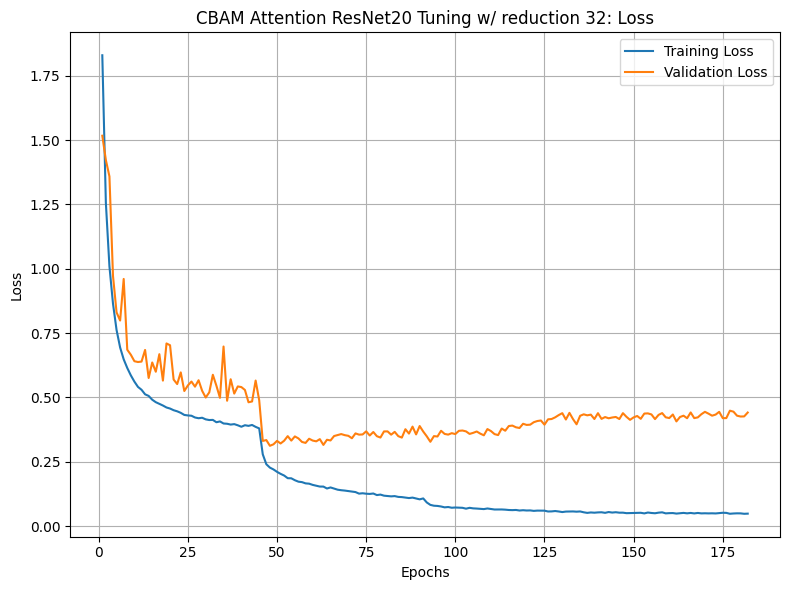

In [14]:
pipeline_template.main('cbam_resnet20_tuning_reduction_32', True, config)
# pipeline_template.main('debug_config')